<a href="https://colab.research.google.com/github/engige/nlp_consumer_complaints_classification/blob/main/index_colab_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Customer Complaints Classification

## Data Exploration

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import pandas as pd

# Define the path to the zip file and the CSV file inside it
zip_path = '/content/drive/MyDrive/data_comp.zip'
csv_filename = 'consumer_complaints.csv'

# Open the zip file and load the CSV file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open(csv_filename) as file:
        df = pd.read_csv(file)

# Displaying the first few raws of the dataframe
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [ ]:
# Displaying basic information about the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  162421 non-null  int64 
 1   product     162421 non-null  object
 2   narrative   162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


In [ ]:
# Dropping the unnecessary 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Dropping rows with missing values in the 'narrative' column
df = df.dropna(subset=['narrative'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162411 entries, 0 to 162420
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162411 non-null  object
 1   narrative  162411 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


In [ ]:
# Checking for duplicate rows based on 'product' and 'narrative' columns
duplicates = df.duplicated(subset=['product', 'narrative']).sum()

duplicates

37735

In [ ]:
# Checking the distribution of the 'product' categories
product_distribution = df['product'].value_counts()

product_distribution

,count
product,
credit_reporting,91172
debt_collection,23148
mortgages_and_loans,18990
credit_card,15566
retail_banking,13535


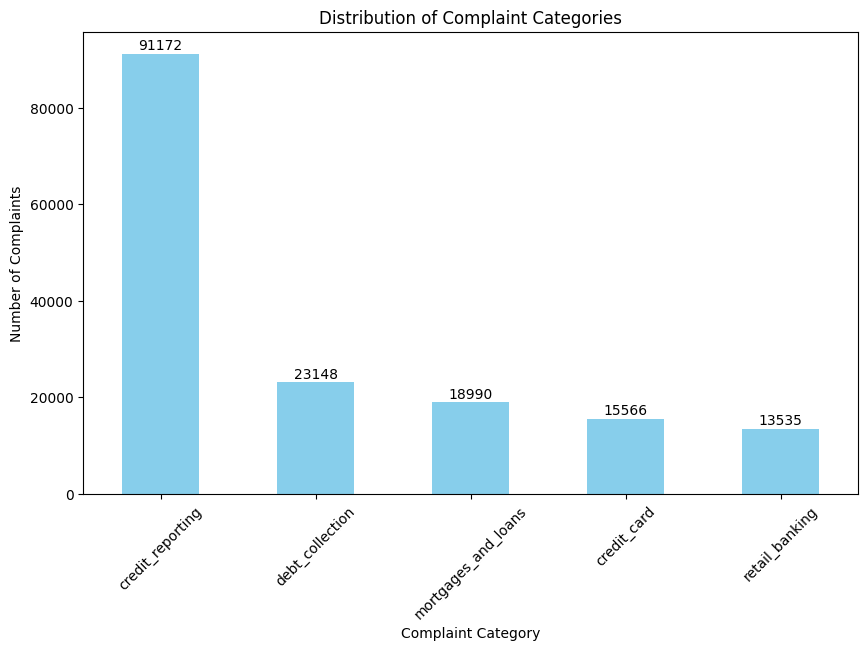

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of complaint categories with complaint counts on top of each bar
plt.figure(figsize=(10, 6))
ax = product_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Complaint Categories')
plt.xlabel('Complaint Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)

# Adding text labels on top of each bar
for i, count in enumerate(product_distribution):
    ax.text(i, count + 200, str(count), ha='center', va='bottom')

plt.show()

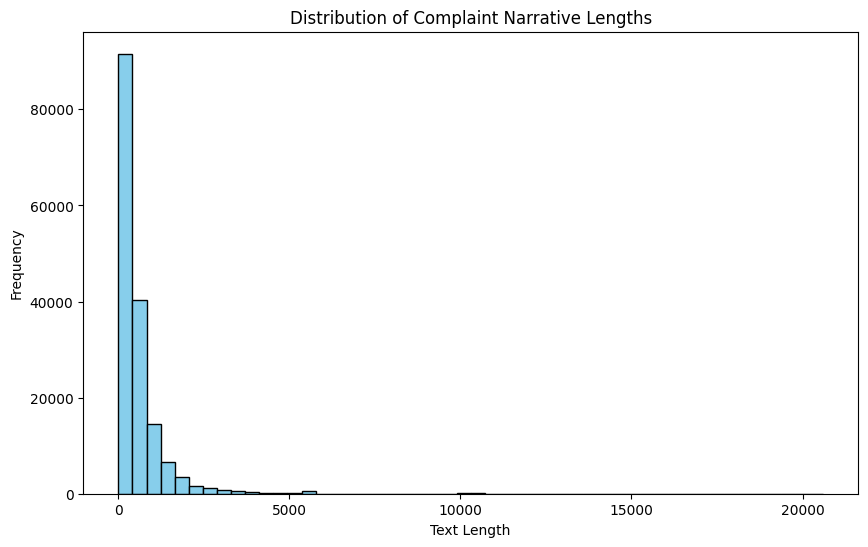

,text_length
count,162411.000000
mean,588.535838
std,830.977413
min,3.000000
25%,192.000000
50%,361.000000
75%,683.000000
max,20596.000000


In [ ]:
import matplotlib.pyplot as plt

# Checking the length of the complaint narrative
# Calculating the length of each complaint narrative
df['text_length'] = df['narrative'].apply(len)

# Summary statistics for text length
text_length_summary = df['text_length'].describe()

# Plotting the distribution of text length
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Complaint Narrative Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

text_length_summary

## Data Preprocessing

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

# Ensure that NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initializing stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Defining the preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    words = word_tokenize(text)
    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join words back into a single string with whitespace handling
    cleaned_text = ' '.join(words).strip()  # Remove leading/trailing whitespace
    return ' '.join(cleaned_text.split())    # Replace multiple spaces with a single space

# Applying preprocessing to the 'narrative' column
df['cleaned_narrative'] = df['narrative'].apply(preprocess_text)

# Displaying a sample of the cleaned narratives
df[['narrative', 'cleaned_narrative']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,narrative,cleaned_narrative
0,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...
1,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...
2,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...
3,payment history missing credit report speciali...,payment history missing credit report speciali...
4,payment history missing credit report made mis...,payment history missing credit report made mis...


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame and 'cleaned_narrative' is the preprocessed text column
# Step 1: Count words in each complaint
df['word_count'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))

# Step 2: Get summary statistics for word counts
word_count_summary = df['word_count'].describe()
print("Word Count Summary:\n", word_count_summary)

Word Count Summary:
 count    162411.000000
mean         80.207935
std         108.821314
min           1.000000
25%          27.000000
50%          50.000000
75%          95.000000
max        2684.000000
Name: word_count, dtype: float64


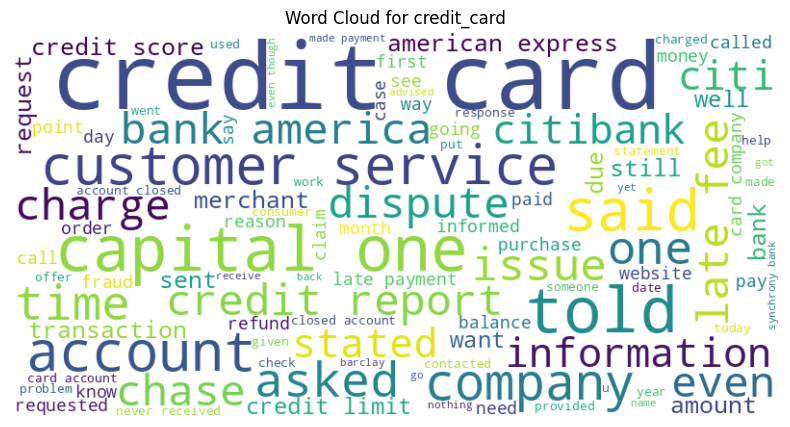

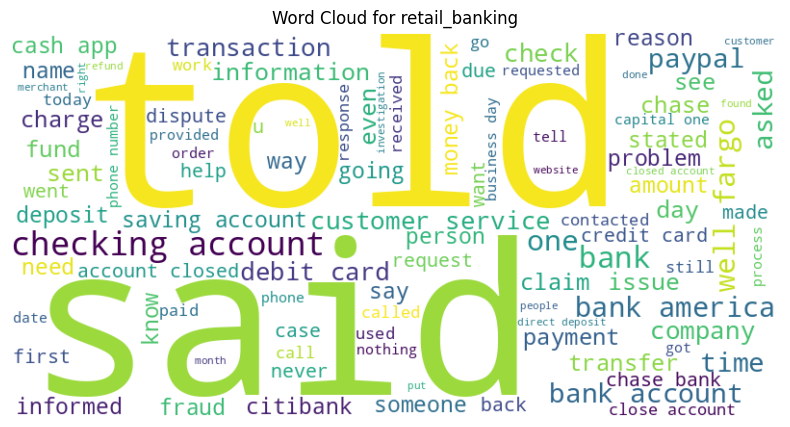

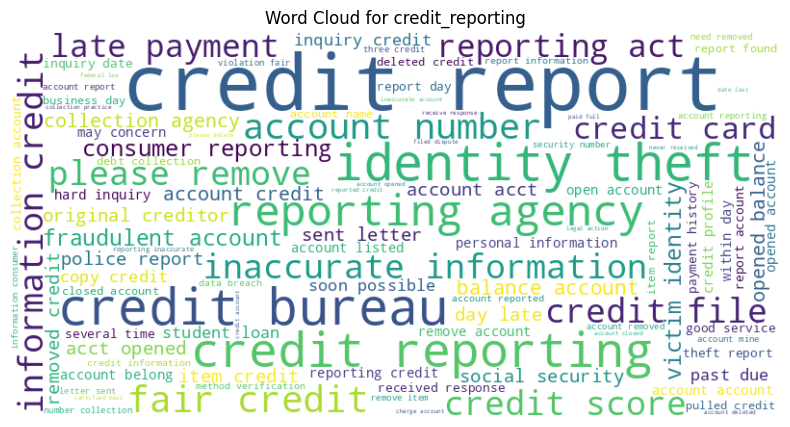

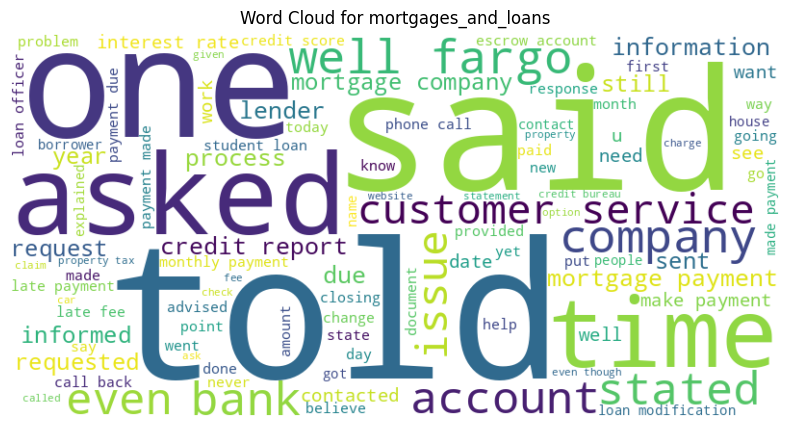

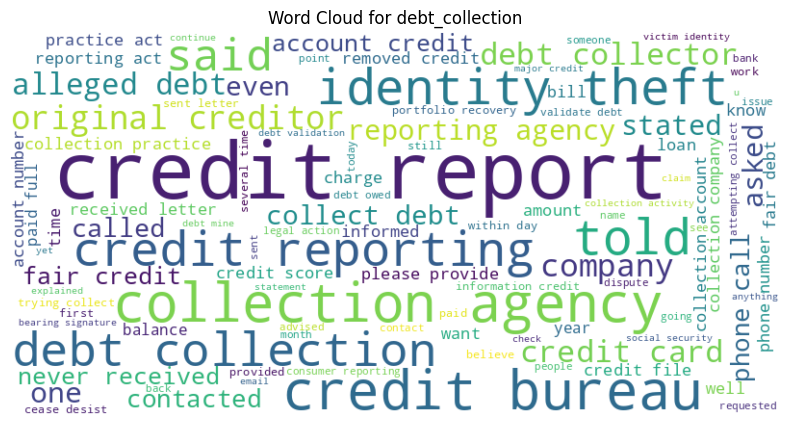

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Checking the most common words in each class
# Function to generate word cloud for each product label
def generate_word_cloud(data, product_label):
    text = ' '.join(data['cleaned_narrative'][data['product'] == product_label])
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {product_label}')
    plt.axis('off')
    plt.show()

# Get unique product labels
product_labels = df['product'].unique()

# Generate and display word cloud for each product label
for label in product_labels:
    generate_word_cloud(df, label)

In [ ]:
import pandas as pd

# Calculate text length
if 'text_length' not in df.columns:
    df['text_length'] = df['cleaned_narrative'].apply(len)

# Calculate word count
if 'number_of_words' not in df.columns:
    df['number_of_words'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))

# Adding text length column (character count for each narrative)
df['text_length'] = df['cleaned_narrative'].apply(len)

# Adding word count column (number of words in each narrative)
df['number_of_words'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))

# Display the relevant columns in the DataFrame
cleaned_df = df[['product', 'cleaned_narrative', 'text_length', 'number_of_words']]

# View the first few rows
cleaned_df.head()

,product,cleaned_narrative,text_length,number_of_words
0,credit_card,purchase order day shipping amount receive pro...,1705,230
1,credit_card,forwarded message date tue subject please inve...,904,132
2,retail_banking,forwarded message cc sent friday pdt subject f...,1230,173
3,credit_reporting,payment history missing credit report speciali...,903,131
4,credit_reporting,payment history missing credit report made mis...,851,123


Above creates a dataframe which includes the product, cleaned_narrative, text_length, and number_of_words columns for easy inspection.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Ensure cleaned_df is a copy of the original DataFrame
cleaned_df = cleaned_df.copy()

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the 'product' column and assign it to the new 'target' column
cleaned_df['target'] = label_encoder.fit_transform(cleaned_df['product'])

# Display the first few rows to verify the target encoding
cleaned_df.head()

,product,cleaned_narrative,text_length,number_of_words,target
0,credit_card,purchase order day shipping amount receive pro...,1705,230,0
1,credit_card,forwarded message date tue subject please inve...,904,132,0
2,retail_banking,forwarded message cc sent friday pdt subject f...,1230,173,4
3,credit_reporting,payment history missing credit report speciali...,903,131,1
4,credit_reporting,payment history missing credit report made mis...,851,123,1


In [ ]:
# Create a dictionary to map each product category to its numeric label
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Mapping of product categories to numeric targets:")
for product, target in label_mapping.items():
    print(f"{product}: {target}")

Mapping of product categories to numeric targets:
credit_card: 0
credit_reporting: 1
debt_collection: 2
mortgages_and_loans: 3
retail_banking: 4


## Data Transformation

In [ ]:
from sklearn.model_selection import train_test_split

# Separate the features (X) and target (y)
X = cleaned_df['cleaned_narrative']
y = cleaned_df['target']

# Perform the train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting splits
print("Training set shapes (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shapes (X_test, y_test):", X_test.shape, y_test.shape)

Training set shapes (X_train, y_train): (129928,) (129928,)
Testing set shapes (X_test, y_test): (32483,) (32483,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler

# Step 1: Apply TF-IDF transformation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Step 2: Apply MinMax Scaling
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train_tfidf.toarray())
X_test_scaled = scaler.transform(X_test_tfidf.toarray())

# Print the shapes of the transformed features to verify
print("Scaled Training set shape:", X_train_scaled.shape)
print("Scaled Testing set shape:", X_test_scaled.shape)

Scaled Training set shape: (129928, 5000)
Scaled Testing set shape: (32483, 5000)


## Model Training

### Multinomial Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Initialize and train the Multinomial Naive Bayes model
baseline_nb_model = MultinomialNB()
baseline_nb_model.fit(X_train_scaled, y_train)

# Step 2: Make predictions on the test set
y_pred_base_nb = baseline_nb_model.predict(X_test_scaled)

# Step 3: Calculate accuracy and classification report
accuracy_base_nb = accuracy_score(y_test, y_pred_base_nb)
report_base_nb = classification_report(y_test, y_pred_base_nb)

# Step 4: Display the evaluation scores
print(f"Accuracy (Baseline MultinomialNB): {accuracy_base_nb}")
print("Classification Report (Baseline MultinomialNB):\n", report_base_nb)

Accuracy (Baseline MultinomialNB): 0.8231998276021304
Classification Report (Baseline MultinomialNB):
               precision    recall  f1-score   support

           0       0.66      0.74      0.70      3113
           1       0.90      0.87      0.88     18235
           2       0.76      0.65      0.70      4630
           3       0.71      0.86      0.78      3798
           4       0.80      0.86      0.83      2707

    accuracy                           0.82     32483
   macro avg       0.77      0.79      0.78     32483
weighted avg       0.83      0.82      0.82     32483



### Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Initialize and train the SVM model
baseline_svm_model = LinearSVC(max_iter=1000, random_state=42)
baseline_svm_model.fit(X_train_scaled, y_train)

# Step 2: Make predictions on the test set
y_pred_base_svm = baseline_svm_model.predict(X_test_scaled)

# Step 3: Calculate accuracy and classification report
accuracy_base_svm = accuracy_score(y_test, y_pred_base_svm)
report_base_svm = classification_report(y_test, y_pred_base_svm)

# Step 4: Display the evaluation scores
print(f"Accuracy (Baseline SVM): {accuracy_base_svm}")
print("Classification Report (Baseline SVM):\n", report_base_svm)

Accuracy (Baseline SVM): 0.8679001323769356
Classification Report (Baseline SVM):
               precision    recall  f1-score   support

           0       0.78      0.76      0.77      3113
           1       0.90      0.93      0.92     18235
           2       0.80      0.73      0.77      4630
           3       0.85      0.81      0.83      3798
           4       0.85      0.86      0.85      2707

    accuracy                           0.87     32483
   macro avg       0.84      0.82      0.83     32483
weighted avg       0.87      0.87      0.87     32483



### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Initialize and train the Logistic Regression model
baseline_lr_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_lr_model.fit(X_train_scaled, y_train)

# Step 2: Make predictions on the test set
y_pred_base_lr = baseline_lr_model.predict(X_test_scaled)

# Step 3: Calculate accuracy and classification report
accuracy_base_lr = accuracy_score(y_test, y_pred_base_lr)
report_base_lr = classification_report(y_test, y_pred_base_lr)

# Step 4: Display the evaluation scores
print(f"Accuracy (Baseline Logistic Regression): {accuracy_base_lr}")
print("Classification Report (Baseline Logistic Regression):\n", report_base_lr)

Accuracy (Baseline Logistic Regression): 0.8732259951359173
Classification Report (Baseline Logistic Regression):
               precision    recall  f1-score   support

           0       0.79      0.78      0.78      3113
           1       0.91      0.94      0.92     18235
           2       0.81      0.73      0.77      4630
           3       0.85      0.82      0.84      3798
           4       0.87      0.87      0.87      2707

    accuracy                           0.87     32483
   macro avg       0.85      0.83      0.84     32483
weighted avg       0.87      0.87      0.87     32483



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Initialize and train the Random Forest model
baseline_rf_model = RandomForestClassifier(random_state=42)
baseline_rf_model.fit(X_train_scaled, y_train)

# Step 2: Make predictions on the test set
y_pred_base_rf = baseline_rf_model.predict(X_test_scaled)

# Step 3: Calculate accuracy and classification report
accuracy_base_rf = accuracy_score(y_test, y_pred_base_rf)
report_base_rf = classification_report(y_test, y_pred_base_rf)

# Step 4: Display the evaluation scores
print(f"Accuracy (Baseline Random Forest): {accuracy_base_rf}")
print("Classification Report (Baseline Random Forest):\n", report_base_rf)

Accuracy (Baseline Random Forest): 0.8847704953360219
Classification Report (Baseline Random Forest):
               precision    recall  f1-score   support

           0       0.82      0.72      0.77      3113
           1       0.90      0.97      0.93     18235
           2       0.89      0.73      0.80      4630
           3       0.88      0.80      0.84      3798
           4       0.86      0.86      0.86      2707

    accuracy                           0.88     32483
   macro avg       0.87      0.82      0.84     32483
weighted avg       0.88      0.88      0.88     32483



## Model Improvement

### Tuned Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Define the parameter distribution for RandomizedSearch
param_dist = {
    'n_estimators': [100, 200, 300, 500],           # Number of trees
    'max_depth': [10, 20, 30, None],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                      # Use bootstrap samples
}

# Step 2: Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Step 3: Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=2,
    verbose=1,
    random_state=42,
    n_jobs=2
)

# Step 4: Perform the random search on the training data
random_search.fit(X_train_scaled, y_train)

# Step 5: Get the best model from the search
best_rf_model = random_search.best_estimator_

# Step 6: Make predictions on the test set
y_pred_tuned_rf = best_rf_model.predict(X_test_scaled)

# Step 7: Calculate accuracy and classification report
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
report_tuned_rf = classification_report(y_test, y_pred_tuned_rf)

# Step 8: Display the best parameters and evaluation scores
print("Best Parameters:", random_search.best_params_)
print(f"Accuracy (Tuned Random Forest): {accuracy_tuned_rf}")
print("Classification Report (Tuned Random Forest):\n", report_tuned_rf)

Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Accuracy (Tuned Random Forest): 0.8892959394144629
Classification Report (Tuned Random Forest):
               precision    recall  f1-score   support

           0       0.82      0.74      0.78      3113
           1       0.91      0.97      0.94     18235
           2       0.88      0.75      0.81      4630
           3       0.88      0.82      0.85      3798
           4       0.85      0.87      0.86      2707

    accuracy                           0.89     32483
   macro avg       0.87      0.83      0.85     32483
weighted avg       0.89      0.89      0.89     32483



### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Initialize individual classifiers
log_reg = LogisticRegression(random_state=42, max_iter=200)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 2: Set up the Voting Classifier
# Use 'soft' voting if you want to consider probability outputs, 'hard' if you want majority voting
voting_clf = VotingClassifier(
    estimators=[('log_reg', log_reg), ('rf', random_forest)],
    voting='soft'  # Change to 'hard' if you don't want to use probabilities
)

# Step 3: Train the Voting Classifier
voting_clf.fit(X_train_scaled, y_train)

# Step 4: Make predictions on the test set
y_pred_voting = voting_clf.predict(X_test_scaled)

# Step 5: Evaluate the model
accuracy_voting = accuracy_score(y_test, y_pred_voting)
report_voting = classification_report(y_test, y_pred_voting)

# Display the evaluation results
print(f"Accuracy (Voting Classifier): {accuracy_voting}")
print("Classification Report (Voting Classifier):\n", report_voting)


Accuracy (Voting Classifier): 0.8920666194624881
Classification Report (Voting Classifier):
               precision    recall  f1-score   support

           0       0.82      0.78      0.80      3113
           1       0.91      0.96      0.93     18235
           2       0.87      0.75      0.81      4630
           3       0.89      0.83      0.86      3798
           4       0.88      0.89      0.88      2707

    accuracy                           0.89     32483
   macro avg       0.87      0.84      0.86     32483
weighted avg       0.89      0.89      0.89     32483



### ExtraTrees

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Extra Trees Classifier
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
et_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_base_et = et_model.predict(X_test_scaled)

# Evaluate the model
accuracy_et = accuracy_score(y_test, y_pred_base_et)
report_et = classification_report(y_test, y_pred_base_et)

print(f"Accuracy (Extra Trees): {accuracy_et}")
print("Classification Report (Extra Trees):\n", report_et)

Accuracy (Baseline Extra Trees): 0.8930209648123634
Classification Report (Baseline Extra Trees):
               precision    recall  f1-score   support

           0       0.83      0.75      0.79      3113
           1       0.91      0.97      0.94     18235
           2       0.90      0.75      0.82      4630
           3       0.88      0.83      0.85      3798
           4       0.86      0.86      0.86      2707

    accuracy                           0.89     32483
   macro avg       0.88      0.83      0.85     32483
weighted avg       0.89      0.89      0.89     32483



### Bidirectional Encoder Representations from Transformers (BERT)

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset
import numpy as np

# Load the BERT tokenizer and model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(set(y_train)))

# Tokenize the data
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

# Prepare the datasets
train_dataset = Dataset.from_dict({"text": X_train, "label": y_train}).map(tokenize_function, batched=True)
test_dataset = Dataset.from_dict({"text": X_test, "label": y_test}).map(tokenize_function, batched=True)

train_dataset = train_dataset.with_format("torch")
test_dataset = test_dataset.with_format("torch")

# Define the evaluation metric function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

# Define training arguments with early stopping
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    metric_for_best_model="f1",
    greater_is_better=True
)

# Trainer with early stopping callback
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # Stops if validation does not improve for 3 epochs
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 19.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from datasets import Dataset
import numpy as np

# Load the BERT tokenizer and model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(set(y_train)))

# Tokenize the data
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

# Prepare the datasets
train_dataset = Dataset.from_dict({"text": X_train, "label": y_train}).map(tokenize_function, batched=True)
test_dataset = Dataset.from_dict({"text": X_test, "label": y_test}).map(tokenize_function, batched=True)

train_dataset = train_dataset.with_format("torch")
test_dataset = test_dataset.with_format("torch")

# Define the evaluation metric function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

# Define training arguments with early stopping
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    metric_for_best_model="f1",
    greater_is_better=True
)

# Trainer with early stopping callback
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # Stops if validation does not improve for 3 epochs
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_resul

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/129928 [00:00<?, ? examples/s]

Map:   0%|          | 0/32483 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.407200,0.592708,0.856017,0.854035,0.856017,0.851681
2,0.614600,0.906372,0.708802,0.701315,0.708802,0.664677
3,0.626600,0.899902,0.642675,0.689901,0.642675,0.621684
4,0.831000,1.028966,0.607056,0.462555,0.607056,0.520559


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluation Results: {'eval_loss': 0.5927075147628784, 'eval_accuracy': 0.8560169935042945, 'eval_precision': 0.8540352822215215, 'eval_recall': 0.8560169935042945, 'eval_f1': 0.8516805113653012, 'eval_runtime': 231.2721, 'eval_samples_per_second': 140.454, 'eval_steps_per_second': 17.559, 'epoch': 4.0}
